In [1]:
%matplotlib inline

from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

Using TensorFlow backend.


In [15]:
# Splitting the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [16]:
# Since this example is for visualization we only use a small subset of our data
# idx = np.random.randint(X_train.shape[0], size=7500)
# X_train = X_train[idx, :]
# y_train = y_train[idx]

# idx_test = np.random.randint(X_test.shape[0], size=2500)
# X_test = X_test[idx_test, :]
# y_test = y_test[idx_test]

In [17]:
# One hot ecoding the label
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

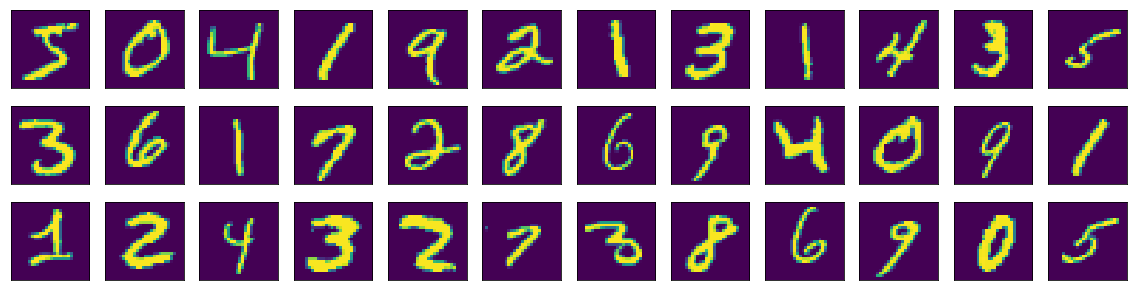

In [18]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i])

In [19]:
# Apply some scaling
X_train = X_train / 255
X_test = X_test / 255

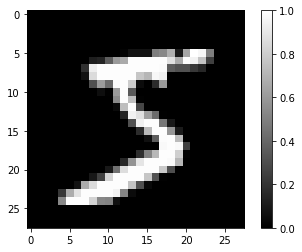

In [20]:
# Control results
plt.imshow(X_train[0],cmap='gray')
plt.colorbar()

In [21]:
# We need a depth for keras
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define a basic model architecture
model = Sequential()
 
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=62, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
          
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 62)        7998      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 62)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 62)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3038)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               388992    
__________

In [23]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy', 'mean_squared_error', 'mean_absolute_error'])

In [24]:
# Drawing callback - thanks to piotr
import livelossplot as lp

plot_callback = lp.PlotLossesKeras()

# Callback for best weights
from keras.callbacks import ModelCheckpoint

save_callback = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=0, 
                               save_best_only=True)

callbacks = [plot_callback, save_callback]

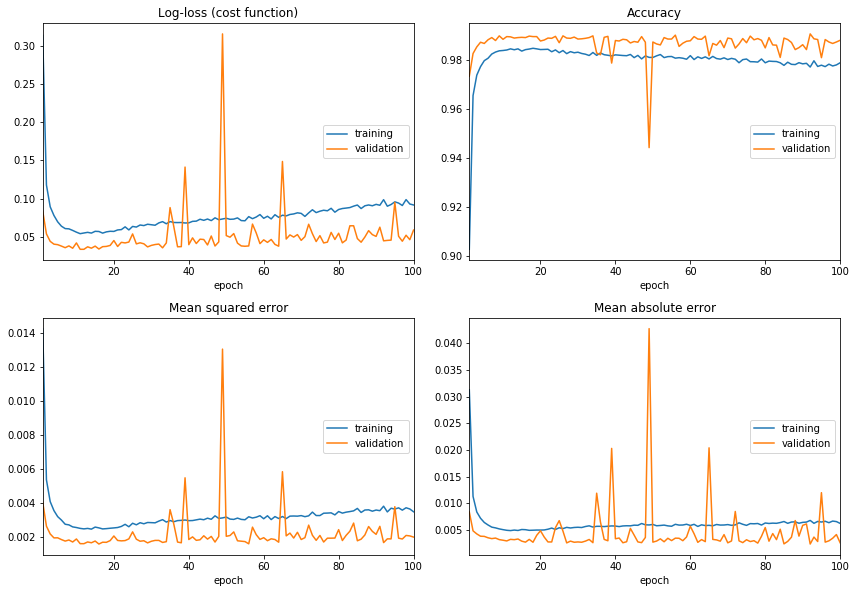

In [25]:
# Train our network
hist = model.fit(X_train, y_train, batch_size=100, epochs=100,
          validation_data=(X_test, y_test), callbacks=callbacks, 
          verbose=1, shuffle=True)

In [26]:
# Evaluate performance with last weights
score = model.evaluate(X_test, y_test, verbose = 0)
for n, i in zip(model.metrics_names, score):
    print("%s: %f" % (n, i))

loss: 0.058681
acc: 0.987900
mean_squared_error: 0.001990
mean_absolute_error: 0.002614


In [27]:
# Evaluate performance with best weights
model.load_weights('model.weights.best.hdf5')
score = model.evaluate(X_test, y_test, verbose = 0)
for n, i in zip(model.metrics_names, score):
    print("%s: %f" % (n, i))

loss: 0.033457
acc: 0.989400
mean_squared_error: 0.001603
mean_absolute_error: 0.002963
